# Project: Twitter sentiment analysis

In   this   hands-on   project,   we   will   train   a   Naive   Bayes   classifier   to   predict   sentiment   from   thousands   of 
 Twitter   tweets.   This   project   could   be   practically   used   by   any   company   with   social   media   presence   to 
 automatically   predict   customer's   sentiment   (i.e.:   whether   their   customers   are   happy   or   not).   The 
 process   could   be   done   automatically   without   having   humans   manually   review   thousands   of   tweets 
 and   customer   reviews.   
 

The following task are performed in the project
* Import libraries and datasets
* Perform Exploratory Data Analysis
* Perform data cleaning - removing punctuation
* Perform data cleaning - remove stop words
* Perform Lemmatization
* Perform Count Vectorization (Tokenization) and TFIDF Vectorization
* Build the suitable algorithms
* Assess trained model performance 

# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk

In [3]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aiswa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Importing Dataset

In [4]:
data= pd.read_csv("D:/DataScience/files/train.csv")
data

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


In [5]:
data.shape

(31962, 3)

In [23]:
data.head()


,id,label,tweet
0,1,0,user when a father be dysfunctional and be so ...
1,2,0,user thank for lyft credit i can't use cause t...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [26]:
data.describe()

,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [27]:
data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

labe 0: positive sentiment, label 1:negative senttiment

# VISUALISING THE DATASET

<AxesSubplot:xlabel='label', ylabel='count'>

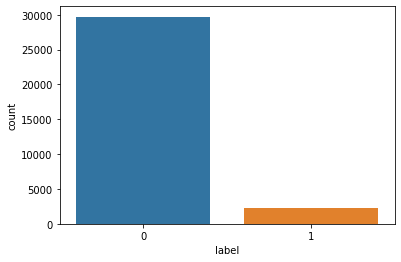

In [28]:
sns.countplot(x = 'label', data = data)

In [29]:
data.columns

Index(['id', 'label', 'tweet'], dtype='object')

# Stopwords

In [6]:
from nltk.corpus import stopwords
stop=stopwords.words("english")
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Data Cleaning

In [47]:
import re
def clean(a):
    a=' '.join(re.sub("(@[A-Za-z0-9]+)|([^A-Za-z0-9']+)|(\w+:\/\/\S+)"," ",a).split())
    return a
   

In [48]:
data.tweet=data.tweet.apply(clean)
data.head()

,id,label,tweet
0,1,0,user when a father be dysfunctional and be so ...
1,2,0,user thank for lyft credit i can't use cause t...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


In [49]:
from nltk.stem.wordnet import WordNetLemmatizer
w=WordNetLemmatizer()
data.tweet=data.tweet.apply(lambda x:' '.join([w.lemmatize(word,'v') for word in x.split()]))
data.head()

,id,label,tweet
0,1,0,user when a father be dysfunctional and be so ...
1,2,0,user thank for lyft credit i can't use cause t...
2,3,0,bihday your majesty
3,4,0,model i love u take with u all the time in ur
4,5,0,factsguide society now motivation


In [50]:
data.iloc[200]

id                                                     201
label                                                    0
tweet    alreemgroup aly alshahawy ad cute summer photo...
Name: 200, dtype: object

In [51]:
data.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

# Count Vectorization 

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer()
new = vector.fit_transform(data.tweet)
new.shape

(31962, 35863)

In [46]:
print(vector.get_feature_names())

['00', '000', '000001', '001', '008', '0099', '00am', '00h30', '00pm', '01', '0115', '0161', '01926889917', '02', '0266808099', '03', '030916', '03111880779', '033', '0345', '039', '04', '0450', '04pm', '05', '0506823156', '05pm', '06', '0606', '0608', '0609', '0610', '061016ev', '0612', '0613', '0616', '0617', '0618', '0619', '0620', '0622', '064', '07', '07788427999', '08', '0830', '09', '09053111156', '095m', '0k', '0shares', '0tolerancemovie', '10', '100', '1000', '10003', '10007', '1000gifts', '1000th', '1000x', '1001', '10014', '10021', '10025', '10040', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100faces', '100happydays', '100happysongs', '100k', '100ml', '101', '1014', '101dalmatians', '101daysofsmiles', '1024x589', '10353', '104', '105', '105kg', '106', '107', '1070', '1080', '109', '10a', '10am', '10days', '10hrs', '10k', '10kday', '10kms', '10m', '10meses', '10miler', '10millionmiler', '10min', '10minutes', '10minutestogo', '10moreyrs', '10pm', '10ppm

In [14]:
vector.vocabulary_

{'user': 33368,
 'when': 34572,
 'father': 11277,
 'be': 3622,
 'dysfunctional': 9875,
 'and': 2203,
 'so': 29260,
 'selfish': 28128,
 'he': 14466,
 'drag': 9601,
 'his': 14845,
 'kid': 17607,
 'into': 16393,
 'dysfunction': 9874,
 'run': 27394,
 'thank': 31429,
 'for': 12086,
 'lyft': 19433,
 'credit': 7838,
 'can': 5730,
 'use': 33360,
 'cause': 6055,
 'they': 31753,
 'don': 9432,
 'offer': 23046,
 'wheelchair': 34568,
 'vans': 33489,
 'in': 15891,
 'pdx': 24125,
 'disapointed': 9117,
 'getthanked': 13013,
 'bihday': 4238,
 'your': 35629,
 'majesty': 19624,
 'model': 20861,
 'love': 19114,
 'take': 30943,
 'with': 34913,
 'all': 1855,
 'the': 31479,
 'time': 31982,
 'ur': 33323,
 'factsguide': 11068,
 'society': 29308,
 'now': 22785,
 'motivation': 21138,
 'huge': 15293,
 'fan': 11168,
 'fare': 11199,
 'big': 4180,
 'talk': 30973,
 'before': 3796,
 'leave': 18284,
 'chaos': 6270,
 'pay': 24072,
 'dispute': 9207,
 'get': 12985,
 'there': 31682,
 'allshowandnogo': 1925,
 'camp': 5704,


# TFIDF Vectorization 

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfdata = TfidfVectorizer()
new1= tfidfdata.fit_transform(data.tweet)
new1


<31962x35863 sparse matrix of type '<class 'numpy.float64'>'
	with 359991 stored elements in Compressed Sparse Row format>

In [72]:
new1.shape

(31962, 35863)

In [77]:
features = tfidfdata.get_feature_names()
features


['00',
 '000',
 '000001',
 '001',
 '008',
 '0099',
 '00am',
 '00h30',
 '00pm',
 '01',
 '0115',
 '0161',
 '01926889917',
 '02',
 '0266808099',
 '03',
 '030916',
 '03111880779',
 '033',
 '0345',
 '039',
 '04',
 '0450',
 '04pm',
 '05',
 '0506823156',
 '05pm',
 '06',
 '0606',
 '0608',
 '0609',
 '0610',
 '061016ev',
 '0612',
 '0613',
 '0616',
 '0617',
 '0618',
 '0619',
 '0620',
 '0622',
 '064',
 '07',
 '07788427999',
 '08',
 '0830',
 '09',
 '09053111156',
 '095m',
 '0k',
 '0shares',
 '0tolerancemovie',
 '10',
 '100',
 '1000',
 '10003',
 '10007',
 '1000gifts',
 '1000th',
 '1000x',
 '1001',
 '10014',
 '10021',
 '10025',
 '10040',
 '100d',
 '100daysofcode',
 '100daysofpigpaintings',
 '100daysoftea',
 '100faces',
 '100happydays',
 '100happysongs',
 '100k',
 '100ml',
 '101',
 '1014',
 '101dalmatians',
 '101daysofsmiles',
 '1024x589',
 '10353',
 '104',
 '105',
 '105kg',
 '106',
 '107',
 '1070',
 '1080',
 '109',
 '10a',
 '10am',
 '10days',
 '10hrs',
 '10k',
 '10kday',
 '10kms',
 '10m',
 '10meses',

In [78]:
tfidfdata.vocabulary_ 

{'user': 33365,
 'when': 34569,
 'father': 11277,
 'be': 3622,
 'dysfunctional': 9875,
 'and': 2203,
 'so': 29257,
 'selfish': 28125,
 'he': 14463,
 'drag': 9601,
 'his': 14842,
 'kid': 17604,
 'into': 16390,
 'dysfunction': 9874,
 'run': 27391,
 'thank': 31426,
 'for': 12085,
 'lyft': 19430,
 'credit': 7838,
 'can': 5730,
 'use': 33357,
 'cause': 6055,
 'they': 31750,
 'don': 9432,
 'offer': 23043,
 'wheelchair': 34565,
 'vans': 33486,
 'in': 15888,
 'pdx': 24122,
 'disapointed': 9117,
 'getthanked': 13011,
 'bihday': 4238,
 'your': 35625,
 'majesty': 19621,
 'model': 20858,
 'love': 19111,
 'take': 30940,
 'with': 34910,
 'all': 1855,
 'the': 31476,
 'time': 31979,
 'ur': 33320,
 'factsguide': 11068,
 'society': 29305,
 'now': 22782,
 'motivation': 21135,
 'huge': 15290,
 'fan': 11168,
 'fare': 11199,
 'big': 4180,
 'talk': 30970,
 'before': 3796,
 'leave': 18281,
 'chaos': 6270,
 'pay': 24069,
 'dispute': 9207,
 'get': 12983,
 'there': 31679,
 'allshowandnogo': 1925,
 'camp': 5704,


In [79]:
print(tfidfdata.get_feature_names())

['00', '000', '000001', '001', '008', '0099', '00am', '00h30', '00pm', '01', '0115', '0161', '01926889917', '02', '0266808099', '03', '030916', '03111880779', '033', '0345', '039', '04', '0450', '04pm', '05', '0506823156', '05pm', '06', '0606', '0608', '0609', '0610', '061016ev', '0612', '0613', '0616', '0617', '0618', '0619', '0620', '0622', '064', '07', '07788427999', '08', '0830', '09', '09053111156', '095m', '0k', '0shares', '0tolerancemovie', '10', '100', '1000', '10003', '10007', '1000gifts', '1000th', '1000x', '1001', '10014', '10021', '10025', '10040', '100d', '100daysofcode', '100daysofpigpaintings', '100daysoftea', '100faces', '100happydays', '100happysongs', '100k', '100ml', '101', '1014', '101dalmatians', '101daysofsmiles', '1024x589', '10353', '104', '105', '105kg', '106', '107', '1070', '1080', '109', '10a', '10am', '10days', '10hrs', '10k', '10kday', '10kms', '10m', '10meses', '10miler', '10millionmiler', '10min', '10minutes', '10minutestogo', '10moreyrs', '10pm', '10ppm

In [80]:
tfidfdata.idf_

array([ 7.44050863,  8.00503843, 10.27372197, ..., 10.67918708,
       10.67918708, 10.27372197])

# SMOTE

In [19]:
from imblearn.combine import SMOTETomek
s = SMOTETomek(random_state=42)
a,b=s.fit_sample(new,data.label)

In [20]:
print(a.shape)
print(b.shape)

(59440, 35867)
(59440,)


In [21]:
a

<59440x35867 sparse matrix of type '<class 'numpy.float64'>'
	with 882626 stored elements in Compressed Sparse Row format>

In [22]:
b.value_counts()


1    29720
0    29720
Name: label, dtype: int64

In [55]:
#SPLITTING THE DATASET INTO TRAIN AND TEST
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(a,b,test_size=0.2,random_state=62)

In [56]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(47552, 35867) (11888, 35867) (47552,) (11888,)


# BERNOULLI -- NAIVE BAYES


In [58]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
#TRAINING THE MODEL
bnb.fit(x_train,y_train)

BernoulliNB()

In [59]:
y_pred=bnb.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [60]:
result = pd.DataFrame({'actual':y_test,'predict':y_pred})
result

,actual,predict
20509,0,0
14604,0,0
57399,1,1
7615,0,0
36721,1,1
...,...,...
30494,0,0
41062,1,1
6808,1,1
45305,1,1


In [61]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print("accuracy score ",accuracy_score(y_pred,y_test))
print("f1 score ",f1_score(y_pred,y_test))
print("precision score ",precision_score(y_pred,y_test))
print("recall score ",recall_score(y_pred,y_test))

accuracy score  0.9665208613728129
f1 score  0.9671508748761967
precision score  0.9845404133759033
recall score  0.9503649635036496


In [62]:
from sklearn.metrics import classification_report
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.98      0.95      0.97      5937\n           1       0.95      0.98      0.97      5951\n\n    accuracy                           0.97     11888\n   macro avg       0.97      0.97      0.97     11888\nweighted avg       0.97      0.97      0.97     11888\n'

# CONCLUSION

Since the given dataset is Twitter tweets of type text document comes under Supervised classification . The target feature consist of only two values(1 and 0) , So Bernoulli naive bayes best suit for the given datset. Among CountVectorization and Tfidf-Vectorization, Our Model predicted good result to Tfidf-Vectorization rather than CountVectorization.Therefore Tfidf-Vectorization is best suited for the given dataset. The model gave the accuracy score of 0.9608008075370121, f1 score 0.9613918806959404 , precision score 0.974962191228365 and recall score is 0.9481941493708123

